In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.rename(columns = {'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, inplace=True)

In [4]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.nunique()

Delivery_Time    21
Sorting_Time      9
dtype: int64

In [7]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values  #dependent variable vector

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test) 
y_pred

array([6.78676086, 4.20800625, 8.23731033, 5.01386706, 3.90580844,
       7.56441655, 4.42155936])

In [12]:
y_test

array([10,  3,  5,  4,  4,  8,  3], dtype=int64)

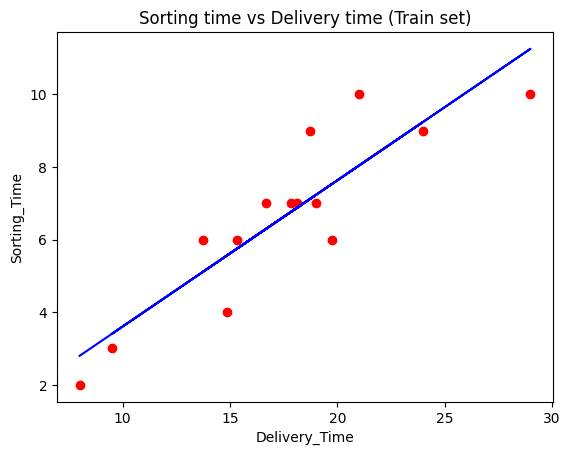

In [13]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Sorting time vs Delivery time (Train set)") # stating the title of the graph
 
plt.xlabel("Delivery_Time") # adding the name of x-axis
plt.ylabel("Sorting_Time") # adding the name of y-axis
plt.show() # specifies end of graph

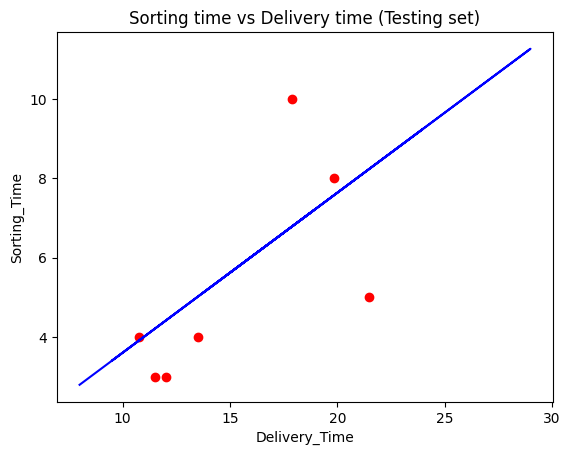

In [14]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Sorting time vs Delivery time (Testing set)") # stating the title of the graph
 
plt.xlabel("Delivery_Time") # adding the name of x-axis
plt.ylabel("Sorting_Time") # adding the name of y-axis
plt.show() # specifies end of graph

In [15]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df).fit()

In [16]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Logrithm Transformation

y= a+ b* log(x)


genreally we apply Logrithm Transformation or Squar root transformation to get best results

In [17]:
# Input dataset
X_log = np.log(df['Delivery_Time'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = df['Sorting_Time'].values.reshape(-1,1)

In [18]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [19]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [20]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [-10.86864266]
Co-efficient Value of Log Model is :  [[6.09166216]]


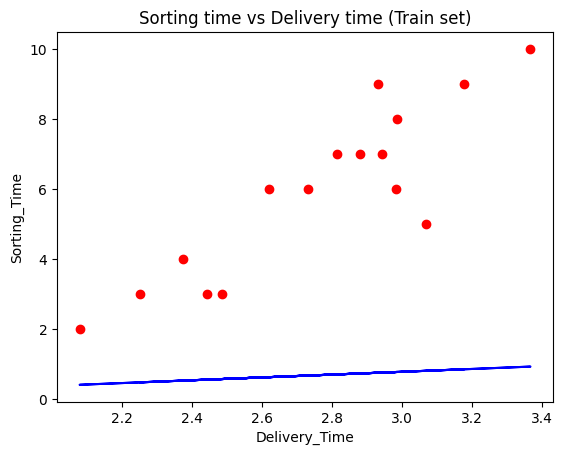

In [23]:
#plot for the TRAIN
 
plt.scatter(X_train_log, Y_train_log, color='red') # plotting the observation line
 
plt.plot(X_train_log, regressor.predict(X_train_log), color='blue') # plotting the regression line
 
plt.title("Sorting time vs Delivery time (Train set)") # stating the title of the graph
 
plt.xlabel("Delivery_Time") # adding the name of x-axis
plt.ylabel("Sorting_Time") # adding the name of y-axis
plt.show() # specifies end of graph

Thus Logrithm Transformation is not best case for the problem